In this project, we will deal with the death row prisoners in Texas (such as race, gender, education level, their  race and thier victims etc.) 
and their recent statements

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from IPython.display import Image
pic1= Image(url= '5.jpg' ,width=800,height=800)
pic1

In [ ]:
Part 1: Initiate the dataset

First, load the data file and look at the basic data.
Second, we will describe the data.

In [19]:
# Read csv file and store in variable
df = pd.read_csv("./Texas Last Statement - CSV.csv" , encoding='latin1')
# fix table column name
newNames = df.columns.values
newNames[16] = 'VictimOtherRaces'
df.columns = newNames
df.head()

,Execution,LastName,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOtherRaces,FemaleVictim,MaleVictim,LastStatement
0,545,Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28.0,11.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"This is my statement: My final words. First, I..."
1,544,Pruett,Robert,999411,38,White,Bee,22.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,I just want to let everyone in here to know I ...
2,543,Preyor,Taichin,999494,46,Black,Bexar,34.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"First and foremost I'd like to say, ""Justice h..."
3,542,Bigby,James,997,61,White,Tarrant,36.0,9.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"Yes, I do, Grace Kehler is that you? I have gi..."
4,541,Ruiz,Rolando,999145,44,Hispanic,Bexar,22.0,10.0,0.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"Yes sir, I would first like to say to the Sanc..."


In [7]:
df.describe()

,Execution,TDCJNumber,Age,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOtherRaces,FemaleVictim,MaleVictim
count,545.00000,545.000000,545.000000,527.000000,500.000000,516.000000,509.000000,517.000000,527.000000,424.000000,423.000000,423.000000,423.000000,526.000000,526.000000
mean,273.00000,517422.089908,39.339450,28.426945,10.148000,0.368217,0.542240,0.736944,1.394687,0.915094,0.255319,0.203310,0.026005,0.678707,0.712928
std,157.47222,499381.226644,8.458398,7.828356,2.076227,0.539757,0.498703,1.187976,0.799126,0.826487,0.616567,0.628161,0.210585,0.784009,0.692342
min,1.00000,511.000000,24.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.00000,808.000000,33.000000,22.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.00000,999014.000000,38.000000,27.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,409.00000,999246.000000,44.000000,33.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,545.00000,999555.000000,67.000000,57.000000,16.000000,6.000000,1.000000,13.000000,7.000000,5.000000,4.000000,6.000000,3.000000,6.000000,4.000000


---------------------------------------------------------------------------------------------------------------------------

Part 2: Presenting graphs based on dataset basic details related to the victims.
In this part of the project we want to examine and present the results of a study of the participants.
gender, race etc.

first of all, we want to examine the distribution of crimes against the gender of victims, which are divided into three categories:
1. Crime against males only
2. A crime against females only
3. Crime against both males and females.

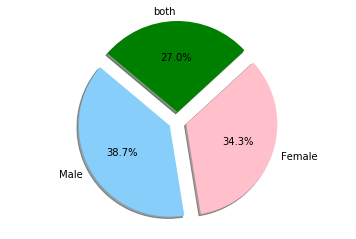

In [5]:
# Create column of victim's gender
df["VictimGender"] = 0
genderList = []
maleCounter = 0
femaleCounter = 0
bothCounter = 0

# count male' female and the both victims number
for i in range(0, len(df)):
    if df.MaleVictim[i] > 0 and df.FemaleVictim[i] > 0:
        genderList.append(2)
        bothCounter += df.MaleVictim[i] + df.FemaleVictim[i]
    elif df.MaleVictim[i] > 0 and df.FemaleVictim[i] == 0:
        genderList.append(0)
        maleCounter += df.MaleVictim[i]
    elif df.MaleVictim[i] == 0 and df.FemaleVictim[i] > 0:
        genderList.append(1)
        femaleCounter += df.FemaleVictim[i]
    else:
        genderList.append(999)
        
df.VictimGender = genderList

#Show victim's gender division
plt.pie([maleCounter, femaleCounter, bothCounter], explode=(0.1, 0.1, 0.1), labels=["Male", "Female", "both"], colors=['lightskyblue', 'pink', 'green'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

We can see from the values found in the result of the pie graph that the gaps are insignificant, yet most of the crimes were committed against men only, than against women, and in the last place crimes against both genders.

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
Now, we want to examine the distribution of crimes against the victims by their race, which are divided into four categories:
1. Hispanic 
2. Black 
3. White 
4. other

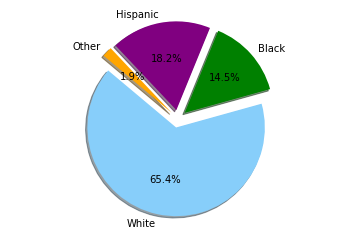

In [18]:
# Create column of victim's race
df["VictimRace"] = 0
whiteCounter = 0
blackCounter = 0
hispanicCounter = 0
otherCounter = 0
# count black, white, hispanic  and other victims number
for i in range(0, len(df)):
    if not np.isnan(df.WhiteVictim[i]):
        whiteCounter += df.WhiteVictim[i]
    if not np.isnan(df.BlackVictim[i]):
        blackCounter += df.BlackVictim[i]
    if not np.isnan(df.HispanicVictim[i]):
        hispanicCounter += df.HispanicVictim[i]
    if not np.isnan(df.VictimOtherRaces[i]):
        otherCounter += df.VictimOtherRaces[i]
# Show race division
plt.pie([whiteCounter, blackCounter, hispanicCounter, otherCounter], explode=(0.1, 0.1, 0.1, 0.1), labels=["White", "Black", "Hispanic", "Other"], colors=['lightskyblue', 'green', 'purple', 'orange'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

As shown in the results, the percentage of crimes against the "white" race is highest.In the second place, the "Hispanic" race, in the third place the "black" race, and the lowest percentage of crimes is against other races.

In this section we would like to examine whether the severity of the punishment is positively or negatively correlated between certain countries and certain races.

In [15]:
dfTemporary=df[[ "BlackVictim", "HispanicVictim", "WhiteVictim","VictimOtherRaces","CountyOfConviction"]].copy()

dfTemporary.apply(lambda x: x.factorize()[0]).corr()

,BlackVictim,HispanicVictim,WhiteVictim,VictimOtherRaces,CountyOfConviction
BlackVictim,1.000000,0.041338,-0.338545,-0.041596,-0.090813
HispanicVictim,0.041338,1.000000,0.141841,0.017396,-0.029198
WhiteVictim,-0.338545,0.141841,1.000000,-0.124572,0.152668
VictimOtherRaces,-0.041596,0.017396,-0.124572,1.000000,-0.041118
CountyOfConviction,-0.090813,-0.029198,0.152668,-0.041118,1.000000


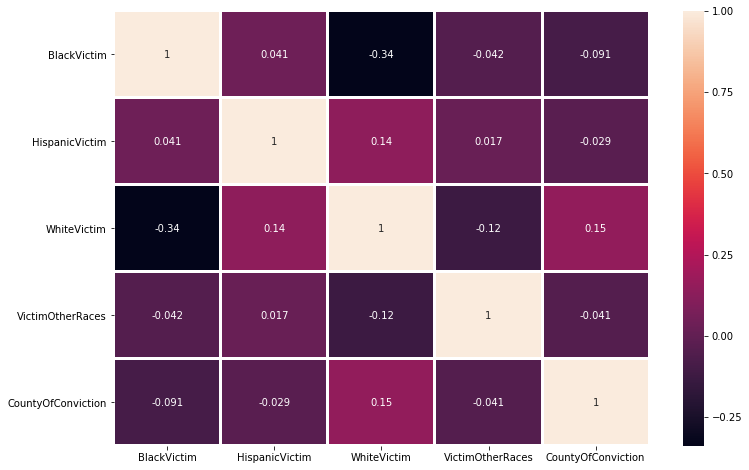

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(dfTemporary.apply(lambda x: x.factorize()[0]).corr(), linewidths=2, annot=True)
plt.show()

In [ ]:
# Here, we tried to check whether there are areas where there is more validity against any race but we learn from the results that there is no such correlation.

---------------------------------------------------------------------------------------------------------------------------

Part 3: Presenting graphs based on dataset basic details related to the offenders.

The "previous crime" column has binary values: 0 and 1 which represent whether the candidate for death committed any other crimes before the sentence.

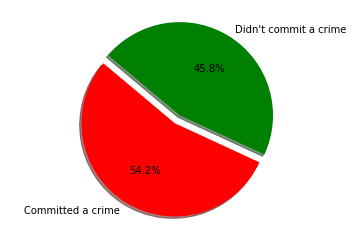

In [6]:
# Show previous crime division
plt.pie([len(df[df["PreviousCrime"] == 1]), len(df[df["PreviousCrime"] == 0])], explode=(0.1, 0), labels=["Committed a crime", "Didn't commit a crime"], colors=['red', 'green'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The results show that most of the candidates did commit past crimes, but the gaps are insignificant.
In fact, for almost half of the offenders it was their first crime!

---------------------------------------------------------------------------------------------------------------------------

Now we want to check positive and negative correlations between all columns with numerical values of our dataframe.

In [7]:
#cheack if ther is a correlation between
df_clean=df[['Age','AgeWhenReceived','EducationLevel','NativeCounty ','VictimGender',"PreviousCrime"]].copy()
df_clean.corr()

,Age,AgeWhenReceived,EducationLevel,NativeCounty,VictimGender,PreviousCrime
Age,1.000000,0.836230,0.075638,0.024159,0.004202,0.202035
AgeWhenReceived,0.836230,1.000000,0.090370,-0.004025,-0.026233,0.203419
EducationLevel,0.075638,0.090370,1.000000,0.104407,-0.008521,-0.181684
NativeCounty,0.024159,-0.004025,0.104407,1.000000,-0.048771,-0.027215
VictimGender,0.004202,-0.026233,-0.008521,-0.048771,1.000000,0.026859
PreviousCrime,0.202035,0.203419,-0.181684,-0.027215,0.026859,1.000000


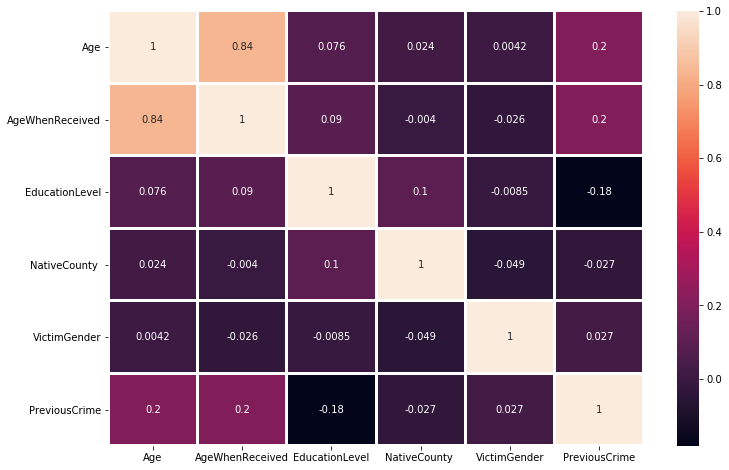

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), linewidths=2, annot=True)
plt.show()

Not suprisingly Age and AgeWhenReceived correlated with each other. But other features not saying much.

---------------------------------------------------------------------------------------------------------------------------

Now we will check if there is a correlation between education level and number of offenders by a  barplot graph.

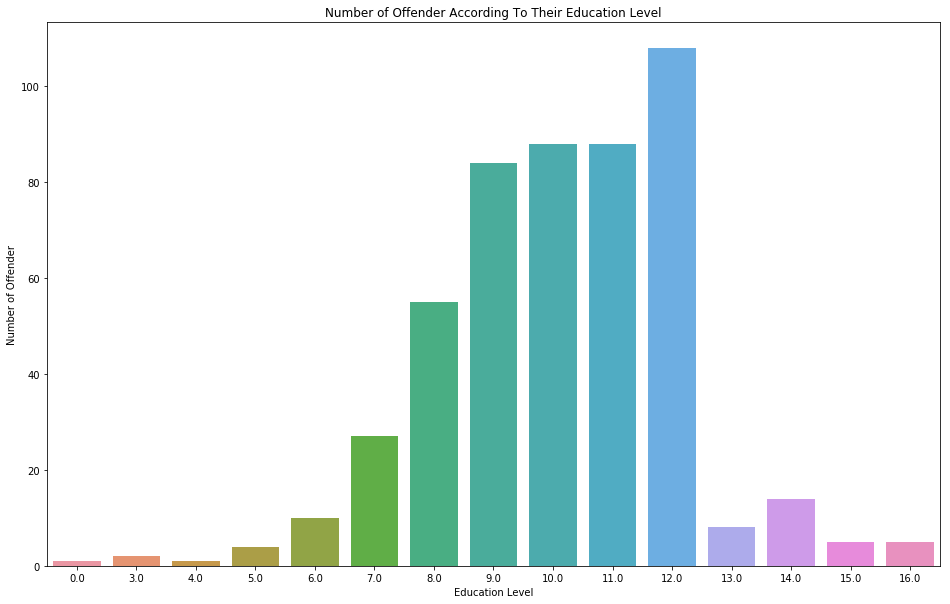

In [9]:
educationList= sorted(list(zip(df.EducationLevel.value_counts().index, df.EducationLevel.value_counts().values)))
eduYear, eduCount = zip(*educationList)
eduYear, eduCount = list(eduYear), list(eduCount)

plt.figure(figsize=(16,10))
plt.xlabel("Education Level")
plt.ylabel("Number of Offenders")
plt.title("Number of Offenders According To Their Education Level")
sns.barplot(x=eduYear,y=eduCount)
plt.show()

We expected to see a positive correlation between education level and number of offenders but we were surprised to see that this was not the case.
We can see that most of the offenders were graduated from high school or they were high school drop out.

---------------------------------------------------------------------------------------------------------------------------

Now, we would like to present the age distribution and the average age of those sentenced to death.

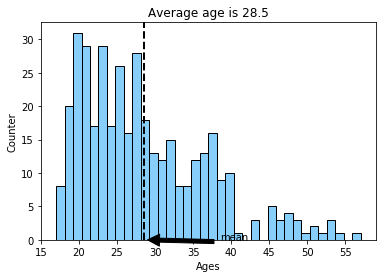

In [10]:
# clean table from NULL values
df.dropna(inplace=True)
# parse age when recived values to integer
df.AgeWhenReceived = df.AgeWhenReceived.astype(int)
# Show ages when received division

ax = df['AgeWhenReceived'].plot.hist(color = 'lightskyblue', edgecolor = 'black', title="Average age is 28.5", bins = int(180/5))
plt.xlabel("Ages")
plt.ylabel("Counter")
mean_val = df['AgeWhenReceived'].mean()
ax.annotate('mean', xy=(mean_val, 0.008), xytext=(mean_val+10, 0.010),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='black')
plt.show(ax)

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
Part 4: Offenders against Victims

Now, we would like to examine the correlation between the race of the offenders and the race of their victims, including the sex of their victims.

In [9]:
# convert offenders race from string to binary true value to another new column in our dataframe
black=[]
white=[]
hispanic=[]
other=[]

for i in df["Race"]:
    if i=="Hispanic":
        hispanic.append(1)
        white.append(0)
        black.append(0)
        other.append(0)
    elif i=="White":
        hispanic.append(0)
        white.append(1)
        black.append(0)
        other.append(0)
    elif i=="Black":
        hispanic.append(0)
        white.append(0)
        black.append(1)
        other.append(0)
    else: 
        hispanic.append(0)
        white.append(0)
        black.append(0)
        other.append(1)
        
df['blackRace'] = black
df['whiteRace'] = white
df['hispanicRace'] = hispanic
df['otherRace'] = other

In [12]:
df_clean=df[["blackRace", "BlackVictim", "HispanicVictim",'hispanicRace', "WhiteVictim",'whiteRace',"VictimOtherRaces",'otherRace', "FemaleVictim", "MaleVictim"]].copy()
df_clean.corr()

,blackRace,BlackVictim,HispanicVictim,hispanicRace,WhiteVictim,whiteRace,VictimOtherRaces,otherRace,FemaleVictim,MaleVictim
blackRace,1.000000,0.404237,-0.084490,-0.347850,-0.236750,-0.671464,0.092384,-0.036676,-0.061249,0.117150
BlackVictim,0.404237,1.000000,-0.129921,-0.140815,-0.347419,-0.271050,-0.040300,-0.016996,0.262280,0.089854
HispanicVictim,-0.084490,-0.129921,1.000000,0.461541,-0.396196,-0.281001,-0.049874,-0.021033,-0.008281,0.243309
hispanicRace,-0.347850,-0.140815,0.461541,1.000000,-0.244051,-0.454561,-0.058873,-0.024828,-0.002732,-0.042463
WhiteVictim,-0.236750,-0.347419,-0.396196,-0.244051,1.000000,0.422510,-0.132099,-0.055710,0.316452,0.150842
whiteRace,-0.671464,-0.271050,-0.281001,-0.454561,0.422510,1.000000,-0.089328,-0.047927,0.064934,-0.087039
VictimOtherRaces,0.092384,-0.040300,-0.049874,-0.058873,-0.132099,-0.089328,1.000000,0.469275,0.001676,0.063835
otherRace,-0.036676,-0.016996,-0.021033,-0.024828,-0.055710,-0.047927,0.469275,1.000000,-0.045508,0.090787
FemaleVictim,-0.061249,0.262280,-0.008281,-0.002732,0.316452,0.064934,0.001676,-0.045508,1.000000,-0.473090
MaleVictim,0.117150,0.089854,0.243309,-0.042463,0.150842,-0.087039,0.063835,0.090787,-0.473090,1.000000


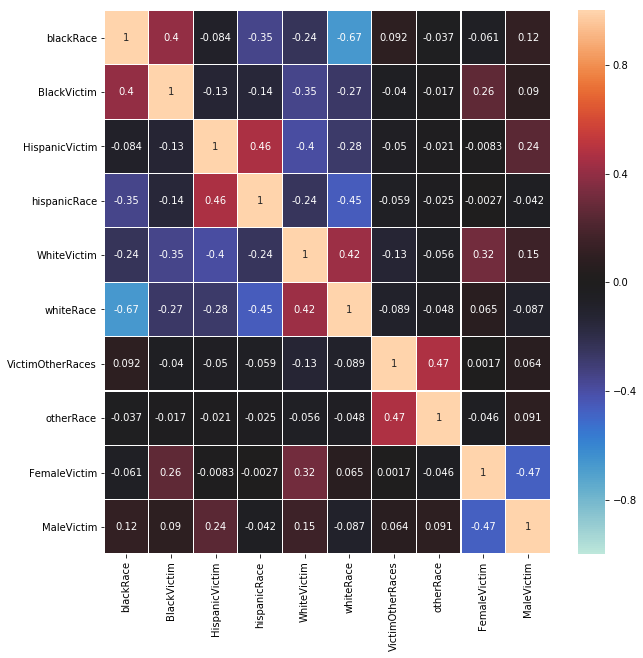

In [13]:
import statsmodels.formula.api as sm
from pandas.plotting import scatter_matrix
import seaborn as sns
corr = df_clean.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr,vmin=-1 ,vmax=1, center=0 , annot=True, linewidths=0.2, cbar=True )

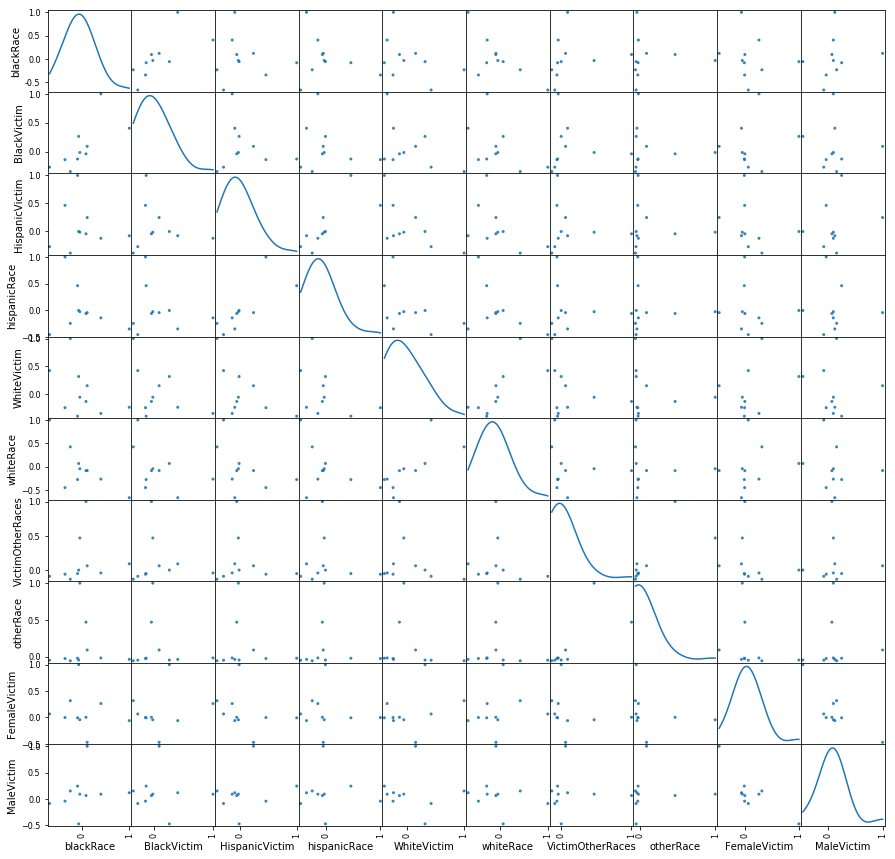

In [14]:
# scatter plot matrix 
corr = df_clean.corr()
s = scatter_matrix(corr , diagonal="kde", alpha = 0.9, figsize=(15, 15))

It can be seen that there is a positive correlation between the candidate's race and the victim's race.
there is also a negative correlation between the offender's race and the gender of the victim.

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
Part 5: Algorithms 

In this part of the project we will examine, according to all the algorithms we have learned in the lectures, whether the various characteristics are interdependent.

In [18]:
from sklearn.model_selection import train_test_split

df_clean=df[['Codefendants','NumberVictim','EducationLevel','AgeWhenReceived',"CountyOfConviction"]]
df_clean = df_clean.dropna()

training_list = ['AgeWhenReceived','NumberVictim',"EducationLevel" ,"Codefendants"]
training = df_clean[training_list]
target = df_clean['CountyOfConviction']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
#y_test are continuous variables
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)

In [21]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, encoded.shape

((322, 4), (322,), (160, 4), (160,), (322,))

In [22]:
#Logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, encoded)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, encoded) * 100, 2)
print('logistic regression:', acc_log)

#SVM
svc = SVC()
svc.fit(X_train, encoded)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, encoded)*100,2)
print('Support Vector Machine:', acc_svc)

#Knearestneighbors

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, encoded)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, encoded) * 100, 2)
print('KNN:', acc_knn)

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, encoded)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, encoded) * 100, 2)
print('Gaussian Naive Bayes:', acc_gaussian)

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, encoded)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, encoded) * 100, 2)
print('Perceptron:', acc_perceptron)

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, encoded)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, encoded) * 100, 2)
print('linear SVC:', acc_linear_svc)

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, encoded)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, encoded) * 100, 2)
print('Stochastic Gradient Descent:', acc_sgd)


# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, encoded)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, encoded) * 100, 2)
print("Decision Tree:", acc_decision_tree)

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, encoded)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, encoded)
acc_random_forest = round(random_forest.score(X_train, encoded) * 100, 2)
print("Random forest:", acc_random_forest)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic regression: 23.6
Support Vector Machine: 40.06
KNN: 37.58
Gaussian Naive Bayes: 23.6


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron: 1.24


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


linear SVC: 20.19
Stochastic Gradient Descent: 1.55
Decision Tree: 84.47
Random forest: 84.47


In [23]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.47
8,Decision Tree,84.47
0,Support Vector Machines,40.06
1,KNN,37.58
2,Logistic Regression,23.60
4,Naive Bayes,23.60
7,Linear SVC,20.19
6,Stochastic Gradient Decent,1.55
5,Perceptron,1.24


--------------------------------------------------------------------------------------------------------------------------

Now we will compare linear regression with Random Forest Regressor on: "NumberVictim", "Codefendants", "AgeWhenReceived" to predict education level.

In [86]:
training_list = ["NumberVictim" ,"Codefendants","AgeWhenReceived"]
training = df_clean[training_list]
target = df_clean["EducationLevel"]

X = training.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [87]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

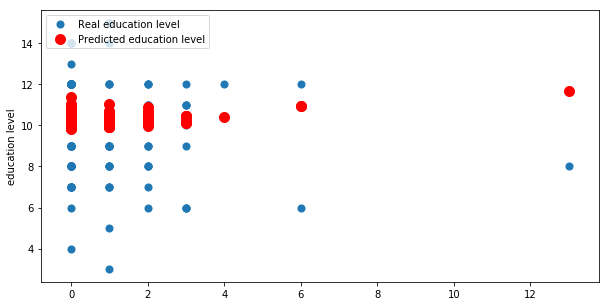

In [88]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real education level");
plt.scatter(X_test[:,1], y_pred_lr,s=100, c='r',label="Predicted education level");
plt.ylabel("education level");
plt.legend(loc=2);

In [79]:
from sklearn.ensemble import RandomForestRegressor
# Create linear regression object
rf = RandomForestRegressor(1)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test)

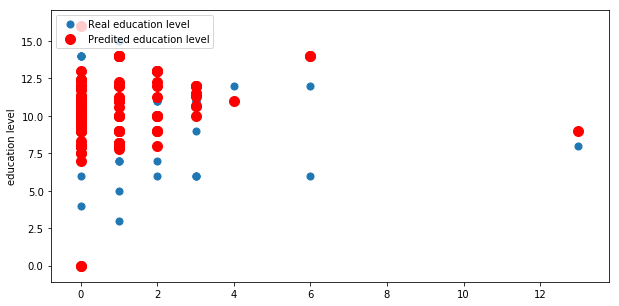

In [89]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real education level");
plt.scatter(X_test[:,1], y_pred_rf,s=100, c='r',label="Predited education level");
plt.ylabel("education level");
plt.legend(loc=2);

In [90]:
# compare the results:
from sklearn.metrics import mean_squared_error

error_lr = mean_squared_error(y_test,y_pred_lr)
error_rf = mean_squared_error(y_test,y_pred_rf)

print(error_lr)
print(error_rf)

4.822246435701331
8.5334670030628


No handles with labels found to put in legend.


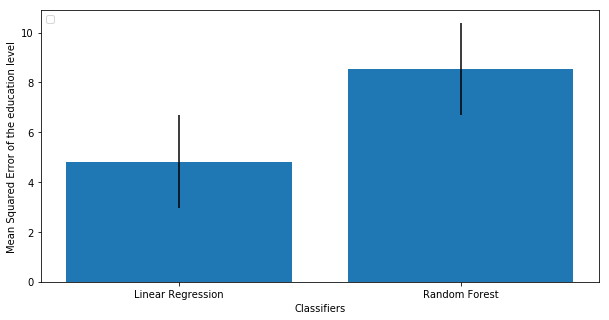

In [91]:
f = plt.figure(figsize=(10,5))
error = [error_lr,error_rf]
plt.bar(range(2), [error_lr,error_rf], yerr=np.std(error))
plt.xlabel("Classifiers");
plt.ylabel("Mean Squared Error of the education level");
plt.xticks(range(2),['Linear Regression','Random Forest'])
plt.legend(loc=2);


In [92]:
np.std(error_rf)

0.0

So the mean squared error for the random forest regression is twice higher than for the linear regression, but both estimators seem to be very decent.

---------------------------------------------------------------------------------------------------------------------------

Now we will deal with clustering.
we want to cluster the cities of Texas By 'Codefendants' , 'NumberVictim' , 'EducationLevel' and 'AgeWhenReceived' of the candidate.

first, Cluster Heat Map using the standard_scale=1 parameter.

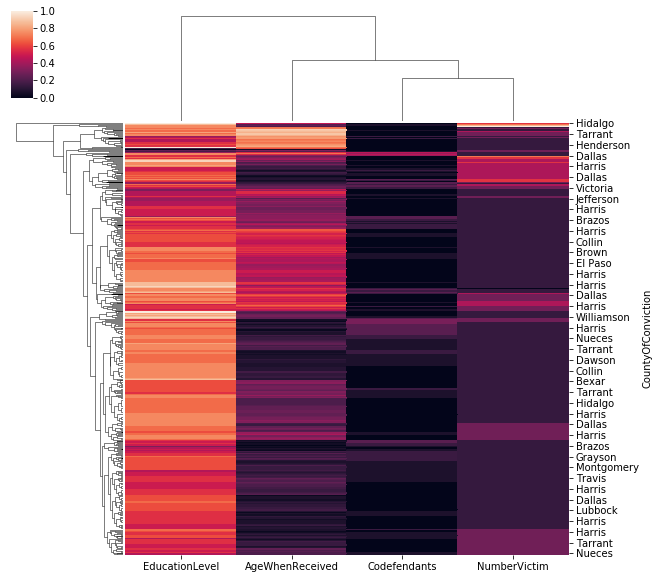

In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])


df1 = df[['Codefendants','NumberVictim','EducationLevel','AgeWhenReceived',"CountyOfConviction"]]
df1 = df1.dropna()
df1 = df1.set_index('CountyOfConviction')
df1

g = sns.clustermap(df1, standard_scale=1)

The dendrograms along the sides show how the variables and the rows are independently clustered. The heat map shows the data value for each row and column.
Any patterns in the heat map may indicate an association between the rows and the columns. 
The main pattern to look for is a rectangular area of about the same color. That suggests a group of rows that are correlated for the corresponding group of columns.

k-means cluster analysis:

In [43]:
#standardize the data to normal distribution
from sklearn import preprocessing
dataset1=df1.copy()
dataset1_standardized = preprocessing.scale(dataset1)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

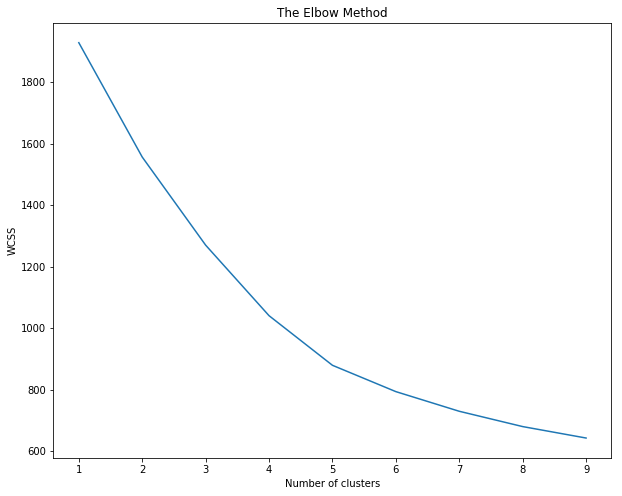

In [44]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the total intra-cluster distance is large for  𝑘=1  and decreases as we increase  𝑘 , until  𝑘=5.After k=5 it tapers of and gets only marginally smaller. This indicates that  𝑘=5  is a good choice.

In [53]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

#Adding cluster to the Dataset1
dataset1['cluster'] = cluster.values
dataset1

,Codefendants,NumberVictim,EducationLevel,AgeWhenReceived,cluster
CountyOfConviction,,,,,
Hidalgo,0.0,1.0,11.0,28.0,1
Bee,0.0,1.0,8.0,22.0,3
Bexar,0.0,1.0,10.0,34.0,2
Tarrant,0.0,1.0,9.0,36.0,2
Bexar,4.0,1.0,10.0,22.0,4
Dallas,1.0,1.0,12.0,30.0,1
Tarrant,0.0,2.0,12.0,37.0,2
Houston,0.0,1.0,9.0,45.0,2
Hidalgo,1.0,1.0,8.0,21.0,3


In [54]:
cluster_1 = list(dataset1[dataset1["cluster"]==1].index)
cluster_2 = list(dataset1[dataset1["cluster"]==2].index)
cluster_3 = list(dataset1[dataset1["cluster"]==3].index)
cluster_4 = list(dataset1[dataset1["cluster"]==4].index)
cluster_5 = list(dataset1[dataset1["cluster"]==5].index)

print("cluster 1: " ,cluster_1)
print(" ")
print("cluster 2: " , cluster_2)
print(" ")
print("cluster 3: " , cluster_3)
print(" ")
print("cluster 4: " , cluster_4)
print(" ")
print("cluster 5: " , cluster_5)

cluster 1:  ['Hidalgo', 'Dallas', 'Wharton', 'Nueces', 'Ellis', 'Tarrant', 'Dallas', 'Jefferson', 'Harris', 'Harris', 'Bexar', 'Bexar', 'Denton', 'Bexar', 'Harris', 'Montgomery', 'Travis', 'Dallas', 'El Paso', 'Harris', 'Collin', 'Harris', 'Bexar', 'Wood', 'Lubbock', 'Bexar', 'Tarrant', 'Tarrant', 'Harris', 'Dallas', 'Hopkins', 'Dallas', 'Tarrant', 'Harris', 'Dallas', 'Potter', 'Bexar', 'Harris', 'Matagorda', 'Harris', 'Bailey', 'Pecos', 'Harris', 'Denton', 'Williamson', 'Harris', 'Harris', 'Bowie', 'Potter', 'Cameron', 'Refugio', 'Dallas', 'Harris', 'Dallas', 'Tarrant', 'Galveston', 'Travis', 'Jefferson', 'Bexar', 'Tarrant', 'Cherokee', 'Johnson', 'Brazos', 'Grayson', 'San Patricio', 'Bexar', 'Harris', 'Jefferson', 'Hidalgo', 'Harris', 'Brazos', 'Dallas', 'Gillespie', 'Brazos', 'Smith', 'Nueces', 'Liberty', 'Red River', 'Anderson', 'Nueces', 'Parker', 'Harris', 'Smith', 'Montgomery', 'Lubbock', 'Jones', 'Smith', 'Collin', 'Montgomery', 'Tarrant', 'Dallas', 'Taylor', 'Lubbock', 'Willia

In [39]:
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Codefendants,NumberVictim,EducationLevel,AgeWhenReceived
cluster,,,,
1,0.3,1.2,11.4,25.2
2,0.3,1.2,10.6,39.9
3,0.4,1.2,7.9,25.1
4,2.9,1.2,10.0,25.0
5,0.7,3.5,10.8,26.6


Interpretation for PCA and K-Means:
we need to specify the number of clusters, in advance and the final results are sensitive to initialization and often     terminates at a local optimum.
#there is no global theoretical method to find the optimal number of clusters.
#A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a        predefined criterion. 
#In general, a large k probably decreases the error but increases the risk of overfitting.

Hierarchical cluster analysis:

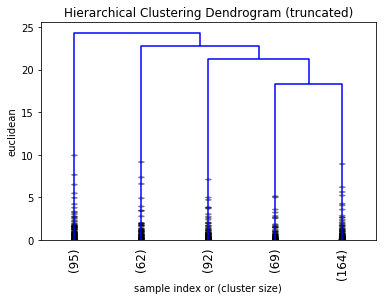

In [46]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2_standardized = dataset1_standardized
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(dataset2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('euclidean')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

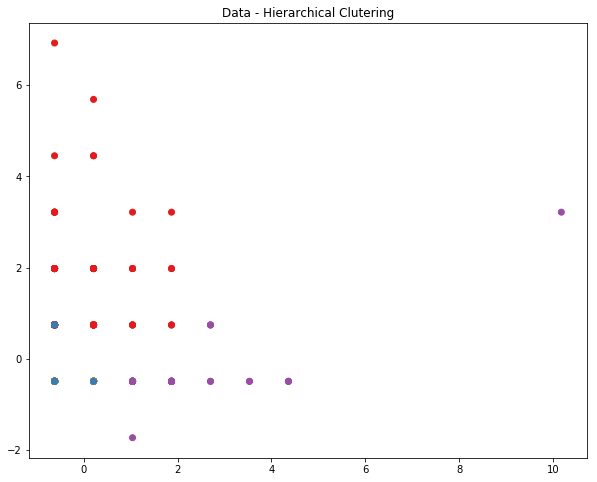

In [47]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(dataset2_standardized.iloc[:,0], dataset2_standardized.iloc[:,1],c=cluster_2, cmap=cmap)  # plot points with cluster dependent colors
plt.title('Data - Hierarchical Clutering')
plt.show()

In [48]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset2=dataset1
dataset2['cluster'] = cluster_Hierarchical.values
dataset2

,Codefendants,NumberVictim,EducationLevel,AgeWhenReceived,cluster
CountyOfConviction,,,,,
Hidalgo,0.0,1.0,11.0,28.0,5
Bee,0.0,1.0,8.0,22.0,4
Bexar,0.0,1.0,10.0,34.0,5
Tarrant,0.0,1.0,9.0,36.0,3
Bexar,4.0,1.0,10.0,22.0,2
Dallas,1.0,1.0,12.0,30.0,5
Tarrant,0.0,2.0,12.0,37.0,3
Houston,0.0,1.0,9.0,45.0,3
Hidalgo,1.0,1.0,8.0,21.0,4


In [49]:
cluster_1 = list(dataset2[dataset2["cluster"]==1].index)
cluster_2 = list(dataset2[dataset2["cluster"]==2].index)
cluster_3 = list(dataset2[dataset2["cluster"]==3].index)
cluster_4 = list(dataset2[dataset2["cluster"]==4].index)
cluster_5 = list(dataset2[dataset2["cluster"]==5].index)

print("cluster 1: " ,cluster_1)
print(" ")
print("cluster 2: " , cluster_2)
print(" ")
print("cluster 3: " , cluster_3)
print(" ")
print("cluster 4: " , cluster_4)
print(" ")
print("cluster 5: " , cluster_5)

cluster 1:  ['Grayson', 'Harris', 'Ellis', 'Bexar', 'Harris', 'Nueces', 'Lubbock', 'Victoria', 'Cherokee', 'Harris', 'Dallas', 'Cherokee', 'Bexar', 'Denton', 'Nueces', 'Fort Bend', 'Harris', 'Collin', 'Harris', 'Tarrant', 'Tarrant', 'Bexar', 'Brazoria', 'Bexar', 'Gregg', 'Dallas', 'Harris', 'Dallas', 'Bexar', 'Gregg', 'Harris', 'Randall', 'Potter', 'Harris', 'Smith', 'Harris', 'Denton', 'Williamson', 'Denton', 'Refugio', 'Tarrant', 'Cameron', 'Refugio', 'Harris', 'Harris', 'Harris', 'Harris', 'Atascosa', 'Harris', 'Cherokee', 'Navarro', 'Johnson', 'Tarrant', 'San Patricio', 'Jefferson', 'Comal', 'Dallas', 'Harris', 'Harris', 'McLennan', 'Jefferson', 'Harris', 'Nueces', 'Smith', 'Ellis', 'Dallas', 'Montgomery', 'Dallas', 'Bastrop', 'Lubbock', 'Henderson', 'Trinity', 'Dallas', 'Tarrant', 'Collin', 'Dallas', 'Montgomery', 'Travis', 'Bexar', 'Harris', 'Travis', 'Aransas', 'Leon', 'Harris', 'McLennan', 'Tarrant', 'Harris', 'Harris', 'Jefferson', 'Dallas', 'Harris', 'McLennan', 'Harris', 'Br

In [50]:
Hierarchical_cluster = pd.DataFrame(round(dataset2.groupby('cluster').mean(),1))
Hierarchical_cluster

,Codefendants,NumberVictim,EducationLevel,AgeWhenReceived
cluster,,,,
1,0.6,2.6,10.2,25.8
2,3.0,1.1,9.8,26.1
3,0.2,1.3,10.5,39.8
4,0.4,1.0,7.4,26.4
5,0.4,1.0,11.2,25.3


There are states which have stayed in the same cluster with the same states as the K-Mean algorithm and there are states that have entered into a different cluster with different states.

---------------------------------------------------------------------------------------------------------------------------

In [45]:
pic2 = Image(url= '2.jpg' ,width=500,height=600)
pic2

In [ ]:
Part 6: Text mining

In this part of the project we will perform text mining.

Now, we will show the most common words from the latest statements of the death row candidates and sort them by each race of those candidates.

In [12]:
# !pip install wordcloud
from wordcloud import STOPWORDS, WordCloud
from PIL import Image
import pandas as pd
import re
import nltk  # Natural Language Tool Kit
# nltk.download('words')
from nltk.corpus import words
# nltk.download("stopwords")
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# nltk.download("stopwords")
# nltk.download('punkt')
# nltk.download('wordnet')

from nltk.corpus import stopwords # We are importing 'stopwords'
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Read CVS file and store in variable
df = pd.read_csv("./Texas Last Statement - CSV.csv", encoding='latin1')

statementList = []
blackList = []
whiteList = []
hispanicList = []
otherList = []
lemmatization = nltk.WordNetLemmatizer()
statementList = df['LastStatement']
raceList = df['Race']
# get and generate all statments list of last confession and devide it per race of offender
for index in range(0, len(statementList)):
    msg = ''
    msg = re.sub("[^a-zA-Z]", " ", statementList[index])
    msg = statementList[index].lower()
    msg = nltk.word_tokenize(msg)
    msg = [i for i in msg if not i in set(stopwords.words("english"))]
    msg = [lemmatization.lemmatize(i)for i in msg]
    msg = " ".join(msg)
    if raceList[index] == 'Hispanic':
        hispanicList.append(msg)
    elif raceList[index] == 'White':
        whiteList.append(msg)
    elif raceList[index] == 'Black':
        blackList.append(msg)
    elif raceList[index] == 'Other':
        otherList.append(msg)

statementList = whiteList + blackList + hispanicList + otherList

countVectorizer = CountVectorizer(max_features=100)
sparceMatrix = countVectorizer.fit_transform(whiteList)
sparceMatrix = sparceMatrix.toarray()
print("White Most Frequent 100 Words: {}".format(countVectorizer.get_feature_names()))
whiteList = format(countVectorizer.get_feature_names())


countVectorizer = CountVectorizer(max_features=100)
sparceMatrix = countVectorizer.fit_transform(blackList)
sparceMatrix = sparceMatrix.toarray()
print("Black Most Frequent 100 Words: {}".format(countVectorizer.get_feature_names()))
blackList = format(countVectorizer.get_feature_names())


countVectorizer = CountVectorizer(max_features=100)
sparceMatrix = countVectorizer.fit_transform(hispanicList)
sparceMatrix = sparceMatrix.toarray()
print("Hispanic Most Frequent 100 Words: {}".format(countVectorizer.get_feature_names()))
hispanicList = format(countVectorizer.get_feature_names())

# right a sentence and cheak which race more likely to say
sentence = "AMEN Hate bless allah"
sentence = sentence.lower()
sentence = sentence.split()



blackCounter = 0
whiteCounter = 0
hispanicCounter = 0

for word in sentence:
    if word in whiteList:
        
        whiteCounter += 1
    if word in blackList:
        
        blackCounter += 1
    if word in hispanicList:
        
        hispanicCounter += 1
if whiteCounter > blackCounter and whiteCounter > hispanicCounter:
    print('white')
elif blackCounter > whiteCounter and blackCounter > hispanicCounter:
    print('black')
elif hispanicCounter > whiteCounter and hispanicCounter > blackCounter:
    print('hispanic')
else:
    print('all')

White Most Frequent 100 Words: ['all', 'always', 'anything', 'apologize', 'ask', 'back', 'bless', 'ca', 'care', 'caused', 'christ', 'closure', 'come', 'coming', 'could', 'day', 'death', 'done', 'everybody', 'everyone', 'everything', 'family', 'father', 'feel', 'find', 'first', 'forgive', 'forgiveness', 'friend', 'get', 'give', 'go', 'god', 'going', 'good', 'goodbye', 'got', 'heart', 'heaven', 'home', 'hope', 'innocent', 'jesus', 'keep', 'know', 'let', 'life', 'like', 'll', 'lord', 'lot', 'love', 'loved', 'make', 'man', 'mom', 'much', 'never', 'none', 'nothing', 'one', 'pain', 'peace', 'people', 'please', 'pray', 'ready', 'really', 'right', 'row', 'said', 'say', 'see', 'shall', 'sin', 'sir', 'sorry', 'still', 'strong', 'support', 'take', 'tell', 'thank', 'thing', 'think', 'time', 'today', 'truth', 've', 'victim', 'want', 'warden', 'way', 'wish', 'world', 'would', 'wrong', 'ya', 'year', 'yes']
Black Most Frequent 100 Words: ['all', 'allah', 'alright', 'always', 'appreciate', 'ask', 'back

show most frequent 100 words not related to the diffrents races.

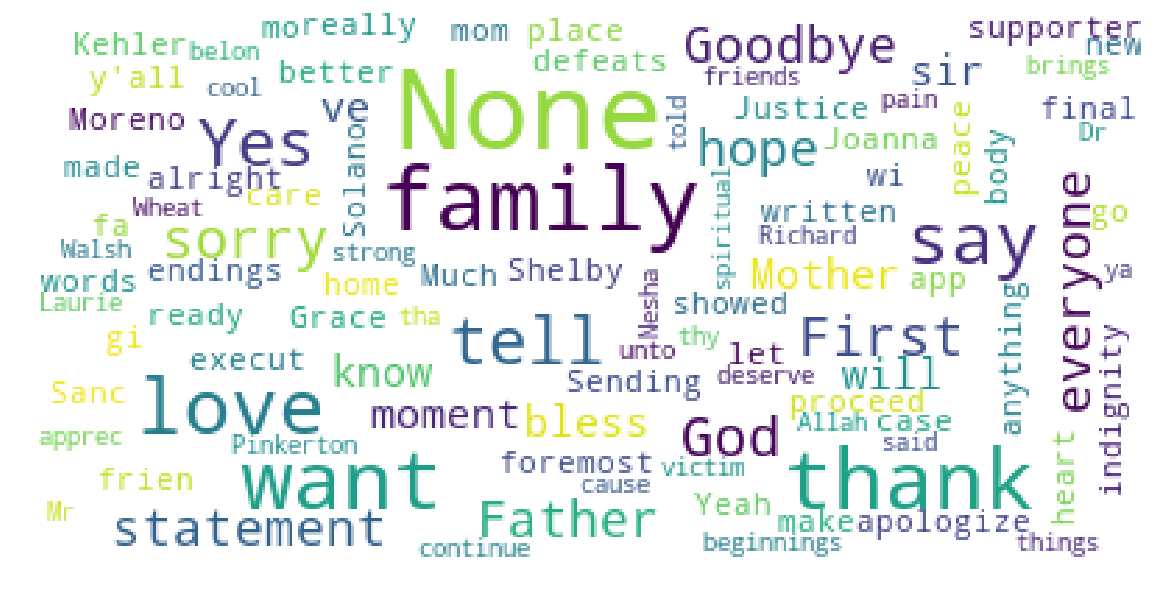

In [11]:
lastword = df["LastStatement"]
wordcloud_q = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=100,
                          max_font_size=40,
                          random_state=1705
                         ).generate(str(lastword))
fig = plt.figure(1, figsize=(20, 15))
plt.imshow(wordcloud_q)
plt.axis('off')
plt.show()

Now through Sentiment Intensity Analyzer we are going to sort out the letters of confessions by negative, positive and neutral emotions.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


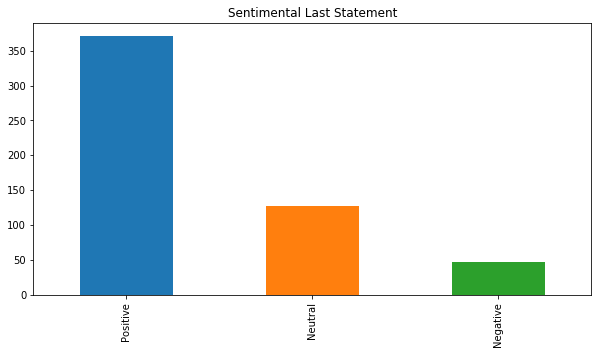

In [14]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import*
senti = SentimentIntensityAnalyzer()

df['Senti_Compound_Score'] = df['LastStatement'].apply(lambda x : senti.polarity_scores(x)['compound'])
df['Neutral_score'] = df['LastStatement'].apply(lambda x : senti.polarity_scores(x)['neu'])
df['Positive_score'] = df['LastStatement'].apply(lambda x : senti.polarity_scores(x)['pos'])
df['Negative_score'] = df['LastStatement'].apply(lambda x : senti.polarity_scores(x)['neg'])

df.loc[df.Senti_Compound_Score >0 ,'Overall_Sentiment']='Positive'
df.loc[df.Senti_Compound_Score == 0, 'Overall_Sentiment'] = 'Neutral'
df.loc[df.Senti_Compound_Score < 0,'Overall_Sentiment'] = 'Negative'

plt.figure(figsize=(10,5))
df.Overall_Sentiment.value_counts().plot(kind='bar',title="Sentimental Last Statement")
plt.show()

In [ ]:
Surprisingly, most of the last statements are with positive attitude.

In [41]:
pic3 = Image(url= '3.jpg' ,width=500,height=600)
pic3

In this section we want to predict the gender of candidates by their first name using the n-gram algorithm we learned in the class.

In [33]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
#from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nltk.tokenize import word_tokenize,sent_tokenize,RegexpTokenizer
from nltk.text import Text
from nltk.util import ngrams
from operator import itemgetter
from nltk import FreqDist
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline


df = pd.read_csv("death-row.csv" , encoding='latin1')
df = df.dropna()
df = df.rename({'First Name': 'FirstName'}, axis=1)
df['FirstName'] = df['FirstName'].str.strip()
df.head()

,TDCJ Number,Link,Last Name,FirstName,Date of Birth,Gender,Race,Date Received,County,Date of Offense
0,999606,Offender Information,Colone,Joseph,08/13/1978,M,Black,05/09/2017,Jefferson,07/31/2010
1,999605,Offender Information,Falk,John,11/19/1966,M,White,03/01/2017,Walker,09/24/2007
2,999604,Offender Information,"Wells, III",Amos,08/20/1990,M,Black,11/22/2016,Tarrant,07/01/2013
3,999603,Offender Information,Brownlow,Charles,09/16/1977,M,Black,05/23/2016,Kaufman,10/28/2013
4,999602,Offender Information,Bluntson,Demond,11/25/1975,M,Black,05/10/2016,Webb,06/19/2012


In [34]:
binary_map = { 'M':'1', 'F':'0'}             
df['Gender'] = df['Gender'].replace(binary_map)
df_clean = df.loc[:,['Gender' , "FirstName" ]]
df_clean['FirstName'] = df_clean.FirstName.map(lambda FirstName: FirstName.lower())
print ("the Length is: ",len(df_clean))
df_clean.head()

the Length is:  238


,Gender,FirstName
0,1,joseph
1,1,john
2,1,amos
3,1,charles
4,1,demond


In [35]:
generated_4grams = []

for word in df_clean.FirstName:
    generated_4grams.append(list(ngrams(word, 4, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))) # n = 4.
generated_4grams
df_clean['words'] = generated_4grams
ng_list_4grams=generated_4grams
for idx, val in enumerate(generated_4grams):
    ng_list_4grams[idx] = (val)
ng_list_4grams
df_clean['words'] = ng_list_4grams

In [36]:
rows = list()
for row in df_clean[['Gender','words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.Gender,word))
        
words = pd.DataFrame(rows,columns=['Gender','words'])
words.words

0       (_, _, _, j)
1       (_, _, j, o)
2       (_, j, o, s)
3       (j, o, s, e)
4       (o, s, e, p)
5       (s, e, p, h)
6       (e, p, h, _)
7       (p, h, _, _)
8       (h, _, _, _)
9       (_, _, _, j)
10      (_, _, j, o)
11      (_, j, o, h)
12      (j, o, h, n)
13      (o, h, n, _)
14      (h, n, _, _)
15      (n, _, _, _)
16      (_, _, _, a)
17      (_, _, a, m)
18      (_, a, m, o)
19      (a, m, o, s)
20      (m, o, s, _)
21      (o, s, _, _)
22      (s, _, _, _)
23      (_, _, _, c)
24      (_, _, c, h)
25      (_, c, h, a)
26      (c, h, a, r)
27      (h, a, r, l)
28      (a, r, l, e)
29      (r, l, e, s)
            ...     
2059    (_, _, _, c)
2060    (_, _, c, l)
2061    (_, c, l, a)
2062    (c, l, a, r)
2063    (l, a, r, e)
2064    (a, r, e, n)
2065    (r, e, n, c)
2066    (e, n, c, e)
2067    (n, c, e, _)
2068    (c, e, _, _)
2069    (e, _, _, _)
2070    (_, _, _, h)
2071    (_, _, h, a)
2072    (_, h, a, r)
2073    (h, a, r, v)
2074    (a, r, v, e)
2075    (r, v

In [37]:
my_features = {}
my_features = words.words.apply(lambda row: row)

In [38]:
ng_list_4grams = my_features
for idx, val in enumerate(my_features):
    ng_list_4grams[idx] = ''.join(val)
ng_list_4grams

0       ___j
1       __jo
2       _jos
3       jose
4       osep
5       seph
6       eph_
7       ph__
8       h___
9       ___j
10      __jo
11      _joh
12      john
13      ohn_
14      hn__
15      n___
16      ___a
17      __am
18      _amo
19      amos
20      mos_
21      os__
22      s___
23      ___c
24      __ch
25      _cha
26      char
27      harl
28      arle
29      rles
        ... 
2059    ___c
2060    __cl
2061    _cla
2062    clar
2063    lare
2064    aren
2065    renc
2066    ence
2067    nce_
2068    ce__
2069    e___
2070    ___h
2071    __ha
2072    _har
2073    harv
2074    arve
2075    rvey
2076    vey_
2077    ey__
2078    y___
2079    ___r
2080    __ra
2081    _ray
2082    raym
2083    aymo
2084    ymon
2085    mond
2086    ond_
2087    nd__
2088    d___
Name: words, Length: 2089, dtype: object

In [39]:
freq_4grams = {}

for ngram in ng_list_4grams:
    if ngram not in freq_4grams:
        freq_4grams.update({ngram: 1})
    else:
        ngram_occurrences = freq_4grams[ngram]
        freq_4grams.update({ngram: ngram_occurrences + 1})
        
from operator import itemgetter # The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. For example, operator.add(x, y) is equivalent to the expression x + y.

freq_4grams_sorted = sorted(freq_4grams.items(), key=itemgetter(1), reverse=True)[0:238] # We only keep the 238 most popular n-grams. This was suggested in the original paper written about n-grams.
freq_4grams_sorted

[('n___', 45),
 ('___j', 37),
 ('y___', 32),
 ('___r', 31),
 ('s___', 26),
 ('e___', 21),
 ('l___', 20),
 ('__jo', 19),
 ('___a', 18),
 ('d___', 18),
 ('___c', 17),
 ('o___', 16),
 ('___d', 15),
 ('__ro', 15),
 ('___b', 14),
 ('___t', 14),
 ('t___', 13),
 ('___m', 12),
 ('an__', 12),
 ('bert', 12),
 ('es__', 11),
 ('en__', 11),
 ('ry__', 11),
 ('r___', 11),
 ('___p', 10),
 ('___g', 10),
 ('ert_', 10),
 ('rt__', 10),
 ('ober', 10),
 ('h___', 9),
 ('_joh', 9),
 ('john', 9),
 ('ohn_', 9),
 ('hn__', 9),
 ('___e', 9),
 ('___s', 9),
 ('__ju', 9),
 ('on__', 9),
 ('___w', 9),
 ('_rob', 9),
 ('robe', 9),
 ('__da', 9),
 ('__ch', 8),
 ('k___', 8),
 ('__ra', 8),
 ('ny__', 8),
 ('char', 7),
 ('_jua', 7),
 ('juan', 7),
 ('uan_', 7),
 ('el__', 7),
 ('illi', 7),
 ('__an', 7),
 ('_jos', 6),
 ('jose', 6),
 ('harl', 6),
 ('arle', 6),
 ('__ma', 6),
 ('__ja', 6),
 ('__pa', 6),
 ('ul__', 6),
 ('eric', 6),
 ('__st', 6),
 ('_ste', 6),
 ('__br', 6),
 ('___h', 6),
 ('m___', 6),
 ('__wi', 6),
 ('_wil', 6),
 ('wi

In [40]:
features_dict = dict(freq_4grams_sorted)
len(features_dict)

238

In [75]:
#this function converts name to a feature vector 
def convert_name(name):
    arr = np.zeros(26*26+814)
    #26*26 all possiable 2-grams + 4 for last 1, 3, 3 excluding last
    name = str(name)
    #Iterate every 2 characters 2gram and caliculate the frequency of the 2gram
    for x in range(len(name)-1):
        ind = (ord(name[x])-ord('a'))*26 + (ord(name[x+1])-ord('a'))
        arr[ind] += 1
    return arr

In [77]:
name_map = np.vectorize(convert_name, otypes=[np.ndarray])
Xlist = name_map(df_clean['FirstName'])
X = np.array(Xlist.tolist())
y = df_clean['Gender']

In [123]:
from sklearn.ensemble import RandomForestClassifier
for x in range(1):
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33)
    clf = RandomForestClassifier(n_estimators=100, min_samples_split=2)
    clf.fit(Xtr, ytr)
    print(np.mean(clf.predict(Xte) == yte))

0.9493670886075949


In [113]:
def assignGender(text):
    xs = df_clean['FirstName']
    ys = y
    pred = clf.predict(X)
    for name,Label,Predict in zip(xs,ys, pred):
         print(name,Label,Predict)

In [114]:
assignGender(df_clean)

joseph 1 1
john 1 1
amos 1 1
charles 1 1
demond 1 1
mark 1 1
james 1 1
paul 1 1
eric 1 1
steven 1 1
brian 1 1
harlem 1 1
fidencio 1 1
cedric 1 1
us 1 1
jeffery 1 1
juan 1 1
brandon 1 1
george 1 1
james 1 1
matthew 1 1
franklin 1 1
obel 1 1
naim 1 1
willie 1 1
micah 1 1
bartholomew 1 1
terence 1 1
rickey 1 1
steven 1 1
tyrone 1 1
roderick 1 1
kimberly 0 0
mark 1 1
kwame 1 1
jaime 1 1
tedderick 1 1
john 1 1
joseph 1 1
albert 1 1
areli 1 1
travis 1 1
cortne 1 1
gary 1 1
garland 1 1
donald 1 1
blaine 1 1
john 1 1
mabry 1 1
milton 1 1
fabian 1 1
demontrell 1 1
paul 1 1
james 1 1
armando 1 1
hector 1 1
erick 1 1
john 1 1
raul 1 1
robert 1 1
lejames 1 1
paul 1 1
melissa 0 0
wesley 1 1
randall 1 1
rosendo 1 1
juan 1 1
kosoul 1 1
dexter 1 1
joseph 1 1
christopher 1 1
richard 1 1
thomas 1 1
juan 1 1
ker'sean 1 1
douglas 1 1
tilon 1 1
john 1 1
clifton 1 1
steven 1 1
ramiro 1 1
demetrius 1 1
joe 1 1
christopher 1 1
stephen 1 1
edward 1 1
travis 1 1
juan 1 1
rodolfo 1 1
moises 1 1
justen 1 1
humber

You can see that the success rate is very high and the algorithm succeeds in predicting the candidate's gender by his first name.